# Assignment Goals

Assignment 6 requires you to implement gradient descent based optimization.  

- Minimum requirement: adapt the code from the presentation to optimize as many of the functions below as possible.
- Write a generic function that will take in 2 other functions as input, and a range of values within which to search, and then implement gradient descent to find the optimum.  The basic requirements of gradient descent are already available in the presentation.
-  For some assignments, the gradient has not been given.  You can either write the function on your own, or suggest other methods that can achieve this purpose.

In [1]:
# The following imports are assumed for the rest of the problems
%matplotlib ipympl
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy import cos, sin, pi, exp 

## Explaination and flow:
- My Code and documnetation will be long because of some unclearity in the problem statement.I have first developed general function and after solving all the 4 problems I calculated 3 of them using my general approach also.I have separately calculated the four problems but to avoid dicrepancy I have written same function with different names. At last I calculated using my general approach also. I have added random test case also to prove functionality of my code.
- Note that I can't implement varying starting point in multi variable as it may involve subtraction of two n x 2 array which will be difficult. I did that for two variable although

## General function for one and multi variable and two variable

## 1-D Variable

I have written two functions,one which was in the initial problem statement where function,derivative,starting point and learning rate was given and then I have to implement gradient descent.I have also added a test case for this code below.I am not plotting animation here in my test case but I will plot in the four problems.

In [2]:
def grad_descent(func,deri,start_point,learning_rate):
    iteration=100000
   
    min_point=start_point
    for items in range(iteration):
        point=min_point
        min_point=min_point-deri(point)*learning_rate
        if(abs(min_point-point)<1e-7):
            break
            
    return min_point 

In [3]:
def function(x):
    return 2* (x ** 2)+8+(x-2)**4+x**3

def derivative(x):
    return 4*((x-2)**3)+3*(x**2)+4*x

# Define the starting point and learning rate

start_point = 0
learning_rate = 0.001

# Use the gradient_descent function to find the minimum

minimum = grad_descent(function, derivative, start_point, learning_rate)
print(f'Minium:{minimum} and value:{function(minimum)}')

Minium:0.870847471375825 and value:11.802767719290307


# Code when function is given and a range to operate is given 

I will comment my code as I am using it in the problem to prevent hindrance

In [4]:
#Gradient decent when derivative is not given for 1 one variable
# def derivati(func,point):
#     dx=1e-11
#     return (func(point+dx)-func(point))/dx
# x_point_array=[]
# def grad_descent_mod(func,derivative,range_operation,learning_rate=0.1):
#     iteration=100000
#     start_point=range_operation[0]
#     ending_point=range_operation[1]
#     x_point_array.append(start_point)
#     min_point=start_point
#     while((min_point<=ending_point)):
#         point=min_point
#         min_point=min_point-derivati(func,point)*learning_rate
#         x_point_array.append(min_point)
#         if(abs(min_point-point)<1e-7):
#             break
            
#     return min_point  


## Multiple variable general gradient descent

For my general code there has to be some constraint on inputs. The assumtions I made are as below:
- The partial derivatives of the n variable are provided as function which returns the partial derivative in the form of array
- I am not including the case where partial derivatives are not given and I have to compute them separately.I have to manually compute the partial derivative and provide.
- I have provided a test case also which shows the input syntax of my function
- I have also include a modified function 



In [25]:
import math
def grad_descent_mult(func,deri,start_point,learning_rate=0.1):
    iteration=100000
   
    min_point=start_point
    
        
    for items in range(iteration):
        point=min_point
        min_point=min_point-(deri(point)*learning_rate)
#         print(min_point)  
        if(isinstance(min_point, float)):
            length=min_point-point
        else:
            length=math.dist(min_point,point)
            
            if(length <1e-7):
                break
    min_point=np.array(min_point,dtype=float)        
    return min_point 

In [6]:
def func(x):
    return x[0]**2 + 2*x[1]**2 + 3*x[2]**2 + 4*x[0]*x[1] + 5*x[1]*x[2]

def deri(x):
    return np.array([
        2*x[0] + 4*x[1],
        4*x[1] + 4*x[0] + 5*x[2],
        6*x[2] + 5*x[1]
    ])

# Define the starting point and learning rate
start_point = np.array([1, 1, 1])
learning_rate = 0.000001

# Use the gradient_descent function to find the minimum
minimum = grad_descent_mult(func, deri, start_point, learning_rate)


print(f"Minimum point found: {minimum} and value is:{func(minimum)}")

Minimum point found: [0.63531964 0.16872481 0.36861922] and value is:1.6079603093202814


## 3 -D plot for two variable

### Plotting 3-D plot for 2 variable using func_animation

I have added a test case to show it's functionality and commented my code

In [7]:
# Visiulisation for 2 variable gradient decent

# Define the function and its derivative
def func(x):
    return x[0]**2+ x[1]**3

def derivative(x):
    return np.array([2*x[0]**1, 3*x[1]**1])

start_point = np.array([1, 1])
learning_rate = 0.1

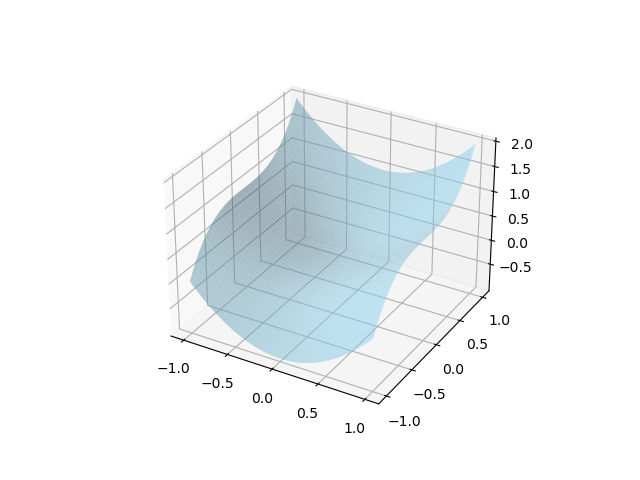

In [8]:
# 3-d plotting the function
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.linspace(-start_point[0], start_point[0], 100)
y = np.linspace(-start_point[1], start_point[1], 100)
X, Y = np.meshgrid(x, y)
Z = np.array(func([X,Y]))
ax.plot_surface(X, Y, Z,color='skyblue', alpha=0.5)


import math
# Rewritting the function for two variable gradient descent and storing all the points obtained from grad_descent
# in an array and then these points will be plotted using animation
def grad_descent_2(func,deri,start_point,learning_rate):
    iteration=100000#Specifying the max iteration
    point_array=[]
    point_array.append(start_point)
    
    min_point=start_point
    for items in range(iteration):
        point=min_point
        min_point=min_point-(deri(point)*learning_rate)
#         print(min_point)
        point_array.append(min_point)
        if(math.dist(min_point,point) <1e-7):
            break
    min_point=np.array(min_point,dtype=float)
    point_array=np.array(point_array,dtype=float)
    return point_array

def update(i):
    
    point_array=grad_descent_2(func,derivative,start_point,learning_rate) 
    # Plot the points in the array
    ax.scatter(point_array[:i, 0], point_array[:i, 1],func([point_array[:i, 0], point_array[:i, 1]]), color='red')

point_array=grad_descent_2(func,derivative,start_point,learning_rate)

plt.show()
ani = FuncAnimation(fig, update, frames=len(point_array)+1, interval=300,repeat=False)




You have to restart your kernel again if the learning rate chosen is to small. As the minima will be reached after very long time because of small learning rate. We will encounter that in Problem 2

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

In [27]:
def f1(x):
    return x ** 2 + 3 * x + 8

In [38]:
#Gradient decent when derivative is not given for 1 one variable
def derivati(func,point):
    dx=1e-11
    return (func(point+dx)-func(point))/dx#Derivative is defined from the first principle of derivative
x_point_array=[]
def grad_descent_mod(func,derivative,range_operation,learning_rate=0.1):
    iteration=100000
    start_point=range_operation[0]
    ending_point=range_operation[1]
    x_point_array.append(start_point)
    min_point=start_point
    while((min_point<=ending_point)):
        point=min_point
        min_point=min_point-derivati(func,point)*learning_rate
        x_point_array.append(min_point)
        if(abs(min_point-point)<1e-7):
            break
            
    return min_point  


- The only change that I made in this code is that instead of iterations I will run the code till ending point if minima is reached it will break out as difference between two points will become very less

In [39]:
#Checking for Problem 1
def f1(x):
    return x ** 2 + 3 * x + 8
minimum1=grad_descent_mod(f1,derivati,[-5,5])
print(f"Minimum point found: {minimum1} and value is:{f1(minimum1)}")
# print(len(x_point_array))

Minimum point found: -1.5000352375454895 and value is:5.750000001241684


### Plotting Animation

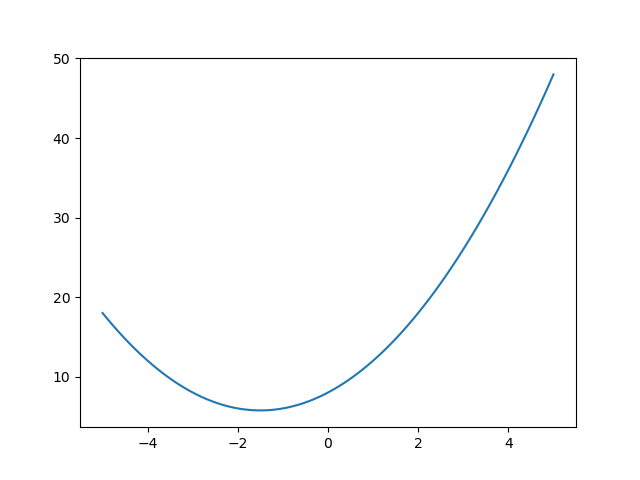

In [40]:
x_point_array=np.array(x_point_array,dtype="float")
fig, ax = plt.subplots()
xbase = np.linspace(-5, 5, 100)
ybase = f1(xbase)
plt.plot(xbase, ybase)
def update1(i):
    ax.scatter(x_point_array[:i], f1(x_point_array[:i]),color='red')

plt.show()
ani = FuncAnimation(fig, update1, frames=len(x_point_array)+1, interval=300,repeat=False)   



Now the above function has many drawbacks it will confuse between global minima and local minima as well as confuse between maxima and minima.I will change the starting points and calculate the minimum obtained at every starting points.It will be more time consuming but will worke for efficiently

In [13]:

def derivati(func,point):
    dx=1e-11
    return (func(point+dx)-func(point))/dx
dic={}
def grad_descent_mod_change(func,derivative,range_operation,learning_rate=0.1):
    iteration=100000
    start_point=range_operation[0]
    ending_point=range_operation[1]
    start_point_array=np.linspace(start_point,ending_point,200)#creating an array of starting point
    store=[]#storing the func(min_point) and finding minimum of the stored values
    
    for items in start_point_array:
        min_point=items
        for i in range(iteration):
            point=min_point
            min_point=min_point-derivati(func,point)*learning_rate
            if(abs(min_point-point)<1e-7):
                break
        store.append(func(min_point))
        dic.update({func(min_point):min_point})#This will create a mapping of f(x) with x
            
    return min(store) 

In [14]:
#Checking the output
minimum2=grad_descent_mod_change(f1,derivati,[-5,5])
print(f"Minimum point found: {dic[minimum2]} and value is:{minimum2}")

Minimum point found: -1.5000005447668237 and value is:5.750000000000297


## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [4]:
import math
def grad_descent_mult2variable(func,deri_x,deri_y,xlim,ylim,learning_rate=0.1):
    iteration=100000
    start_point=[xlim[0],ylim[0]]#Start point array
    end_point=[xlim[1],ylim[1]]#end point array
    start_point=np.array(start_point,dtype=float)
    end_point=np.array(end_point,dtype=float)
    min_point=start_point
    def deri(x):#returning derivatives as array
        return np.array([deri_x(x[0],x[1]),deri_y(x[0],x[1])])
    
    
    while(min_point[0]<=end_point[0] and min_point[1]<=end_point[1]):
        point=min_point
        min_point=min_point-(deri(point)*learning_rate)
#         print(min_point)
        if(math.dist(min_point,point) <1e-7):
            break
    min_point=np.array(min_point,dtype=float)        
    return min_point 

In [28]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4
min3=grad_descent_mult2variable(f3,df3_dx,df3_dy,xlim3,ylim3,0.001)
print(f"Minimum point found: {min3} and value is:{f3(min3[0],min3[1])}")

Minimum point found: [3.97076 2.     ] and value is:2.0000007309868124


**This Animation will be slow as learning rate is very small 0.001 otherwise it will overshoot. You might have to restart the kernal because it will take a long time to reach the minimum**.The loading of plot will also be a bit slow on my computer atleast.

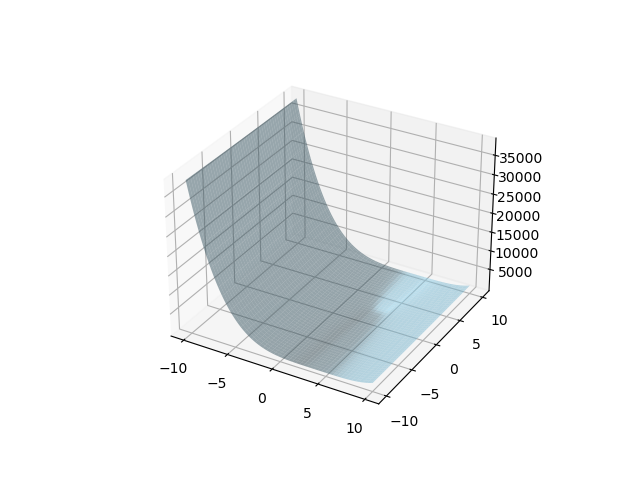

In [21]:
#3-d animation same as above written
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.linspace(xlim3[0], xlim3[1], 100)
y = np.linspace(ylim3[0], ylim3[1], 100)
X, Y = np.meshgrid(x, y)
Z = np.array(f3(X,Y))
# print(Z)
ax.plot_surface(X, Y, Z,color='skyblue', alpha=0.5)

import math
def grad_descent_mult2(func,deri_x,deri_y,xlim,ylim,learning_rate=0.1):
    start_point=[xlim[0],ylim[0]]
    end_point=[xlim[1],ylim[1]]
    start_point=np.array(start_point,dtype=float)
    end_point=np.array(end_point,dtype=float)
    min_point=start_point
    point_array=[]
    point_array.append(start_point)
    def deri(x):
        return np.array([deri_x(x[0],x[1]),deri_y(x[0],x[1])])
    
    min_point=start_point
    while(min_point[0]<=end_point[0] and min_point[1]<=end_point[1]):
        point=min_point
        min_point=min_point-(deri(point)*learning_rate)
#         print(min_point)
        point_array.append(min_point)
        if(math.dist(min_point,point) <1e-7):
            break
    min_point=np.array(min_point,dtype=float)
    point_array=np.array(point_array,dtype=float)
    return point_array
    

def update(i):
    
    point_array=grad_descent_mult2(f3,df3_dx,df3_dy,xlim3,ylim3,0.001) 
    # Plot the points in the array
    ax.scatter(point_array[:i, 0], point_array[:i, 1],f3(point_array[:i, 0], point_array[:i, 1]), color='red')

point_array=grad_descent_mult2(f3,df3_dx,df3_dy,xlim3,ylim3,0.001)

ani = FuncAnimation(fig, update, frames=len(point_array)+1, interval=50,repeat=False)
plt.show()

In [6]:
#Again implementing by changing starting points
dic1={}
def grad_descent_mult2variable_mod(func,deri_x,deri_y,xlim,ylim,learning_rate=0.1):
    iteration=10000
    start_point_x=np.linspace(xlim[0],xlim[1],10)#changing starting point of x
    start_point_y=np.linspace(ylim[0],ylim[1],10)#changing starting point of y
    def deri(x):
        return np.array([deri_x(x[0],x[1]),deri_y(x[0],x[1])])#array of derivative
    store1=[]
    for entries in start_point_x:#Varying starting point
        for entries1 in start_point_y:
            start_point=np.array([entries,entries1])
            min_point=start_point
#             print(min_point)
            for i in range(iteration):
                point=min_point
                min_point=min_point-(deri(point)*learning_rate)
        #         print(min_point)
                if(math.dist(min_point,point) <1e-7):
                    break
        store1.append(func(min_point[0],min_point[1]))#storing value of function of minimum point
        dic1.update({func(min_point[0],min_point[1]):min_point})#creating mapping of f(x)=x
        
    min_point=np.array(min_point,dtype=float)        
    return min(store1)#returns gloabal minima

## This might take some time to run

In [7]:
min3_mod=grad_descent_mult2variable_mod(f3,df3_dx,df3_dy,xlim3,ylim3,0.001)
print(f"Minimum point found: {dic1[min3_mod]} and value is:{min3_mod}")


Minimum point found: [3.88975091 2.00000002] and value is:2.0001477406748336


## Problem 3 - 2-D function 

Derivatives and limits given. 

In [29]:
xlim4 = [-pi, pi]
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)

def f4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def f4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)


In [9]:
import math
#Same function
def grad_descent_mult2variable(func,deri_x,deri_y,xlim,ylim,learning_rate=0.01):
    
    start_point=[xlim[0],ylim[0]]
    end_point=[xlim[1],ylim[1]]
    start_point=np.array(start_point,dtype=float)
    end_point=np.array(end_point,dtype=float)
    min_point=start_point
    def deri(x):
        return np.array([deri_x(x[0],x[1]),deri_y(x[0],x[1])])
    
    
    while(min_point[0]<=end_point[0] and min_point[1]<=end_point[1]):
        point=min_point
        min_point=min_point-(deri(point)*learning_rate)
#         print(min_point)
        if(math.dist(min_point,point) <1e-7):
            break
    min_point=np.array(min_point,dtype=float)        
    return min_point 

In [10]:
min4=grad_descent_mult2variable(f4,f4_dx,f4_dy,xlim4,xlim4,0.1)
print(f"Minimum point found: {min4} and value is:{f4(min4[0],min4[1])}")

Minimum point found: [-1.57079801 -1.57079764] and value is:-0.9999999999989995


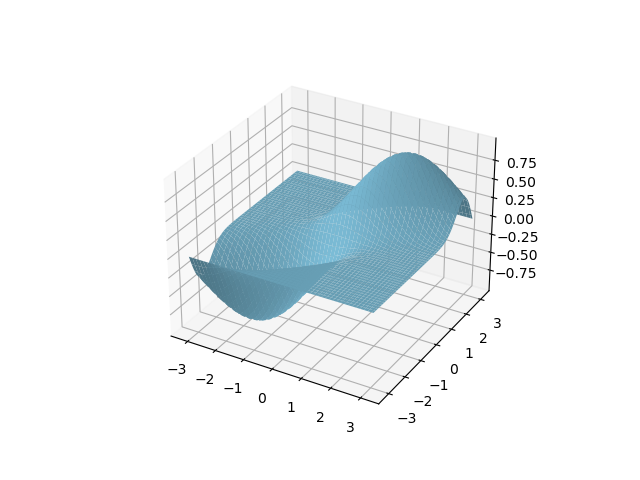

In [11]:
#3d plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.linspace(xlim4[0], xlim4[1], 100)
y = np.linspace(xlim4[0], xlim4[1], 100)
X, Y = np.meshgrid(x, y)
Z = np.array(f4(X,Y))
# print(Z)
ax.plot_surface(X, Y, Z,color='skyblue')

import math
def grad_descent_mult2(func,deri_x,deri_y,xlim,ylim,learning_rate=0.1):
    
    start_point=[xlim[0],xlim[0]]
    end_point=[xlim[1],xlim[1]]
    start_point=np.array(start_point,dtype=float)
    end_point=np.array(end_point,dtype=float)
    min_point=start_point
    point_array=[]
    point_array.append(start_point)
    def deri(x):
        return np.array([deri_x(x[0],x[1]),deri_y(x[0],x[1])])
    
    min_point=start_point
    while(min_point[0]<=end_point[0] and min_point[1]<=end_point[1]):
        point=min_point
        min_point=min_point-(deri(point)*learning_rate)
#         print(min_point)
        point_array.append(min_point)
        if(math.dist(min_point,point) <1e-7):
            break
    min_point=np.array(min_point,dtype=float)
    point_array=np.array(point_array,dtype=float)
    return point_array
    

def update(i):
    
    point_array=grad_descent_mult2(f4,f4_dx,f4_dy,xlim4,xlim4,0.1) 
    # Plot the points in the array
    ax.scatter(point_array[:i, 0], point_array[:i, 1],f4(point_array[:i, 0], point_array[:i, 1]), color='red')

point_array=grad_descent_mult2(f4,f4_dx,f4_dy,xlim4,xlim4,0.1)

plt.show()
ani = FuncAnimation(fig, update, frames=len(point_array)+1, interval=50,repeat=False)

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

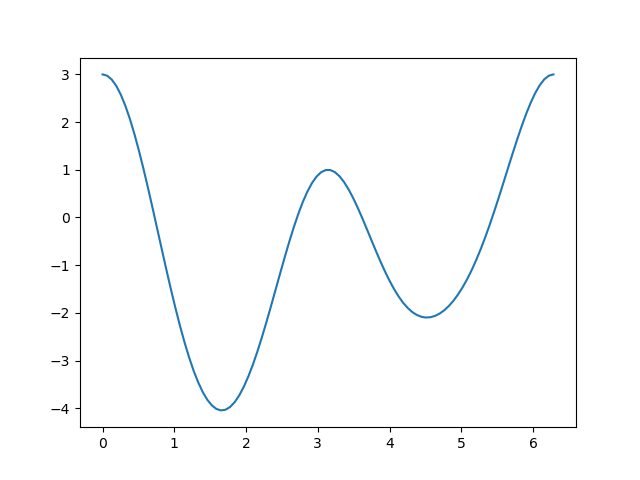

In [12]:
def f5(x):
    return (np.cos(x))**4 - (np.sin(x))**3 - 4*(np.sin(x))**2 + (np.cos(x)) + 1
fig, ax = plt.subplots()
xbase = np.linspace(0,2*pi, 100)
ybase = f5(xbase)
plt.plot(xbase, ybase)


**In this function there is a maxima at starting point so I have to use only my function where starting points are changing so that I can arrive at global minima.** Generally,Gradient descent approach in periodic function has to go through this or else if I use my normal gradient descent I will get x=0 as my answer. I have shown that using animation also.

In [31]:
#Now this function has many drawbacks it will confuse between global minima and local minima as well as confuse between maxima and minima
#I am using this because this function will have maxima and minima and it wil get stuck at maxima which is at x=0 I will show
#my animation if I use my previous approach where I didn't change starting point
def derivati(func,point):
    dx=1e-8
    return (func(point+dx)-func(point))/dx
dic={}
def grad_descent_mod_change(func,derivative,range_operation,learning_rate=0.1):
    iteration=10000
    start_point=range_operation[0]
    ending_point=range_operation[1]
    start_point_array=np.linspace(start_point,ending_point,100)
    store=[]
    
    for items in start_point_array:
        min_point=items
        for i in range(iteration):
            point=min_point
            min_point=min_point-derivati(func,point)*learning_rate
            if(abs(min_point-point)<1e-7):
                break
        store.append(func(min_point))
        dic.update({func(min_point):min_point})
            
    return min(store) 

In [32]:
minimum5=grad_descent_mod_change(f5,derivati,[0,2*np.pi])
print(f"Minimum point found: {dic[minimum5]} and value is:{minimum5}")

Minimum point found: 1.6616608087616265 and value is:-4.045412051572553


I will show why I am not using normal gradient descent algorithim

In [33]:
#Gradient decent when derivative is not given for 1 one variable
def derivati(func,point):
    dx=1e-11
    return (func(point+dx)-func(point))/dx
x_point_array1=[]
def grad_descent_mod(func,derivative,range_operation,learning_rate=0.1):
    iteration=100000
    start_point=range_operation[0]
    ending_point=range_operation[1]
    x_point_array1.append(start_point)
    min_point=start_point
    while((min_point<=ending_point)):
        point=min_point
        min_point=min_point-derivati(func,point)*learning_rate
        x_point_array1.append(min_point)
        if(abs(min_point-point)<1e-7):
            break
            
    return min_point  



If I use normal gradient descent algorithim I will be stuck

[0, 0.0]


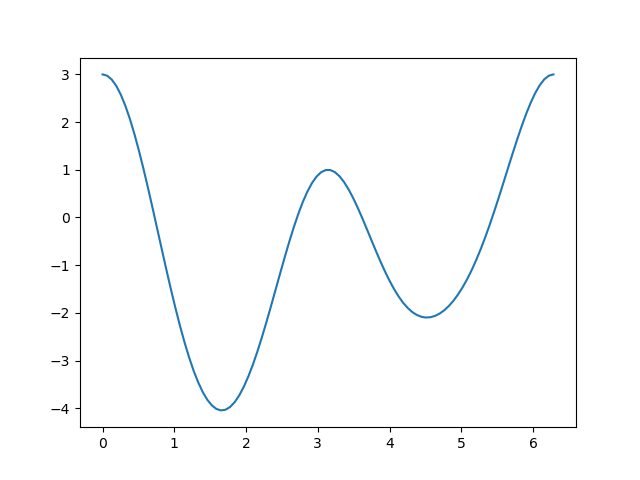

In [34]:

min_x=grad_descent_mod(f5,derivati,[0,2*np.pi])
print(x_point_array1)
x_point_array1=np.array(x_point_array1,dtype="float")
fig, ax = plt.subplots()
xbase = np.linspace(0,2*pi, 100)
ybase = f5(xbase)
plt.plot(xbase, ybase)
def update1(i):
    ax.scatter(x_point_array1[:i], f5(x_point_array1[:i]),color='red')

plt.show()
ani = FuncAnimation(fig, update1, frames=len(x_point_array1)+1, interval=300,repeat=False) 

[0.1, 0.23176570945461208, 0.5336886405553741, 1.131623675373794, 1.6623413673893084, 1.6615952975167603, 1.6616574700061393, 1.6616663517903363, 1.6616663517903363]


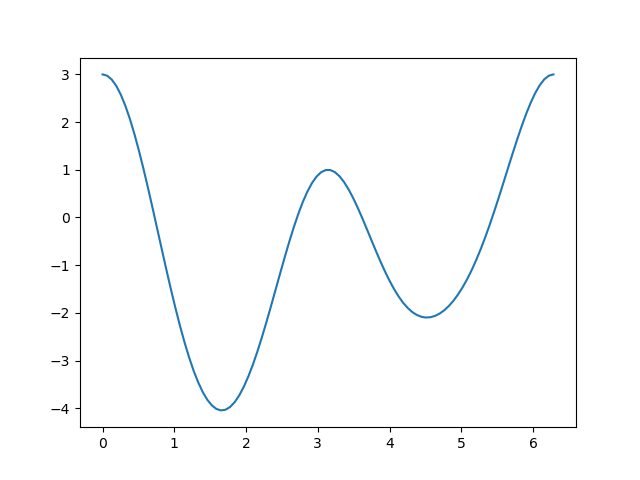

In [35]:
#If I displace the starting point
x_point_array1=[]
min_x=grad_descent_mod(f5,derivati,[0.1,2*np.pi])
print(x_point_array1)

fig, ax = plt.subplots()
xbase = np.linspace(0,2*pi, 100)
ybase = f5(xbase)
plt.plot(xbase, ybase)
def update1(i):
    ax.scatter(x_point_array1[:i], f5(x_point_array1[:i]),color='red')

plt.show()
ani = FuncAnimation(fig, update1, frames=len(x_point_array1)+1, interval=300,repeat=False) 

### Using my multivariable code on Problem1 ,Problem2 and Problem3(grad_descent_mult)

In [41]:
def derif1(x):
    return 2*x+3

min_gen1=grad_descent_mult(f1,derif1,-5,0.1)
print(f"Minima for f1 at {min_gen1} and the value is {f1(min_gen1)}")
def deri1(x):#returning derivatives as array
        return np.array([df3_dx(x[0],x[1]),df3_dy(x[0],x[1])])
min_gen2=grad_descent_mult(f3,deri1,[-10,-10],0.001)
print(f"Minima for problem2 at {min_gen2} and the value is {f3(min_gen2[0],min_gen2[1])}")
def deri2(x):#returning derivatives as array
        return np.array([f4_dx(x[0],x[1]),f4_dy(x[0],x[1])])
min_gen3=grad_descent_mult(f4,deri2,[-pi,-pi],0.01)
print(f"Minima for problem3 at {min_gen3} and the value is {f4(min_gen3[0],min_gen3[1])}")



Minima for f1 at -1.5000000000000004 and the value is 5.75
Minima for problem2 at [3.96464808 2.        ] and the value is 2.0000015618948055
Minima for problem3 at [-1.5708142  -1.57081028] and the value is -0.9999999998872899
